In [1]:
from stable_baselines3 import PPO, DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tmp_path = "./results/cartpole"
new_logger = configure(tmp_path, ["stdout", "csv", "tensorboard"])


env = gym.make("CartPole-v1")
model = A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.0007,  
    n_steps=10,            
    gamma=0.99,            
    gae_lambda=1.0,      
    ent_coef=0.0,         
    vf_coef=0.5,           
    max_grad_norm=0.5,     
    device='cpu'
)


model.set_logger(new_logger)
model.learn(total_timesteps=500_000)


mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')


log_data = pd.read_csv(f"{tmp_path}/progress.csv")  
sns.set_theme(style="darkgrid")  
plt.figure(figsize=(10, 6))  


sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", data=log_data, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("A2C Training Curve on CartPole-v1")
plt.legend()


plt.show()


print('modelo treinado')


In [2]:
from stable_baselines3 import DQN, A2C
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.makedirs("models", exist_ok=True)
os.makedirs("results/cartpole_a2c", exist_ok=True)
os.makedirs("results/cartpole_dqn", exist_ok=True)
total_timesteps = 200000


a2c_log_path = "./results/cartpole_a2c"
dqn_log_path = "./results/cartpole_dqn"
a2c_logger = configure(a2c_log_path, ["csv","stdout"])
dqn_logger = configure(dqn_log_path, ["csv","stdout"])


env = gym.make("CartPole-v1")



model_dqn = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.001,
    buffer_size=50000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=500,
    exploration_fraction=0.2,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.05,
    learning_starts=1000,
    device='cpu',
)


model_dqn.set_logger(dqn_logger)
print("Training DQN...")
model_dqn.learn(total_timesteps=total_timesteps)
model_dqn.save("models/dqn_cartpole")


mean_reward_dqn, std_reward_dqn = evaluate_policy(model_dqn, model_dqn.get_env(), n_eval_episodes=10)
print(f'DQN Mean reward: {mean_reward_dqn} +/- {std_reward_dqn:.2f}')


model_a2c = A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.0007,
    n_steps=10,
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    device='cpu',
)


model_a2c.set_logger(a2c_logger)
print("Training A2C...")
model_a2c.learn(total_timesteps=total_timesteps)
model_a2c.save("models/a2c_cartpole")


mean_reward_a2c, std_reward_a2c = evaluate_policy(model_a2c, model_a2c.get_env(), n_eval_episodes=10)
print(f'A2C Mean reward: {mean_reward_a2c} +/- {std_reward_a2c:.2f}')


try:
    a2c_log_data = pd.read_csv(f"{a2c_log_path}/progress.csv")
    dqn_log_data = pd.read_csv(f"{dqn_log_path}/progress.csv")
    
    
    a2c_log_data['Algorithm'] = 'A2C'
    dqn_log_data['Algorithm'] = 'DQN'

    
    sns.set_theme(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  

    
    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=dqn_log_data, 
        ax=ax1, 
        color="blue"
    )
    ax1.set_title(f"DQN Training ({total_timesteps} timesteps)", fontsize=12)
    ax1.set_xlabel("Timesteps", fontsize=10)
    ax1.set_ylabel("Mean Episode Reward", fontsize=10)
    ax1.grid(True, alpha=0.3)

    
    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=a2c_log_data, 
        ax=ax2, 
        color="orange"
    )
    ax2.set_title(f"A2C Training ({total_timesteps} timesteps)", fontsize=12)
    ax2.set_xlabel("Timesteps", fontsize=10)
    ax2.set_ylabel("")  
    ax2.grid(True, alpha=0.3)

    
    y_min = min(
        dqn_log_data["rollout/ep_rew_mean"].min(), 
        a2c_log_data["rollout/ep_rew_mean"].min()
    ) - 10
    
    y_max = max(
        dqn_log_data["rollout/ep_rew_mean"].max(), 
        a2c_log_data["rollout/ep_rew_mean"].max()
    ) + 10
    
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error loading log files: {e}")
    print("Please check if the CSV files were created in the results directory.")
env.close()

In [3]:

from stable_baselines3 import DQN, A2C
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.makedirs("models", exist_ok=True)
os.makedirs("results/lunar_a2c", exist_ok=True)
os.makedirs("results/lunar_dqn", exist_ok=True)
total_timesteps = 400000


a2c_log_path = "./results/lunar_a2c"
dqn_log_path = "./results/lunar_dqn"
a2c_logger = configure(a2c_log_path, ["csv","stdout"])
dqn_logger = configure(dqn_log_path, ["csv","stdout"])


env = gym.make("LunarLander-v3")



model_dqn = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.001,
    buffer_size=50000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=500,
    exploration_fraction=0.2,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.05,
    learning_starts=1000,
    device='cpu',
)


model_dqn.set_logger(dqn_logger)
print("Training DQN...")
model_dqn.learn(total_timesteps=total_timesteps)
model_dqn.save("models/dqn_lunar")


mean_reward_dqn, std_reward_dqn = evaluate_policy(model_dqn, model_dqn.get_env(), n_eval_episodes=10)
print(f'DQN Mean reward: {mean_reward_dqn} +/- {std_reward_dqn:.2f}')


model_a2c = A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.0007,
    n_steps=10,
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    device='cpu',
)


model_a2c.set_logger(a2c_logger)
print("Training A2C...")
model_a2c.learn(total_timesteps=total_timesteps)
model_a2c.save("models/a2c_lunar")


mean_reward_a2c, std_reward_a2c = evaluate_policy(model_a2c, model_a2c.get_env(), n_eval_episodes=10)
print(f'A2C Mean reward: {mean_reward_a2c} +/- {std_reward_a2c:.2f}')


try:
    a2c_log_data = pd.read_csv(f"{a2c_log_path}/progress.csv")
    dqn_log_data = pd.read_csv(f"{dqn_log_path}/progress.csv")
    
    
    a2c_log_data['Algorithm'] = 'A2C'
    dqn_log_data['Algorithm'] = 'DQN'

    
    sns.set_theme(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  

    
    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=dqn_log_data, 
        ax=ax1, 
        color="blue"
    )
    ax1.set_title(f"DQN Training ({total_timesteps} timesteps)", fontsize=12)
    ax1.set_xlabel("Timesteps", fontsize=10)
    ax1.set_ylabel("Mean Episode Reward", fontsize=10)
    ax1.grid(True, alpha=0.3)

    
    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=a2c_log_data, 
        ax=ax2, 
        color="orange"
    )
    ax2.set_title(f"A2C Training ({total_timesteps} timesteps)", fontsize=12)
    ax2.set_xlabel("Timesteps", fontsize=10)
    ax2.set_ylabel("")  
    ax2.grid(True, alpha=0.3)

    
    y_min = min(
        dqn_log_data["rollout/ep_rew_mean"].min(), 
        a2c_log_data["rollout/ep_rew_mean"].min()
    ) - 10
    
    y_max = max(
        dqn_log_data["rollout/ep_rew_mean"].max(), 
        a2c_log_data["rollout/ep_rew_mean"].max()
    ) + 10
    
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error loading log files: {e}")
    print("Please check if the CSV files were created in the results directory.")
env.close()

In [2]:


from stable_baselines3 import DQN, A2C
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ale_py

gym.register_envs(ale_py)

os.makedirs("models", exist_ok=True)
os.makedirs("results/breakout_a2c", exist_ok=True)
os.makedirs("results/breakout_dqn", exist_ok=True)
total_timesteps = 400000

a2c_log_path = "./results/breakout_a2c"
dqn_log_path = "./results/breakout_dqn"
a2c_logger = configure(a2c_log_path, ["csv","stdout"])
dqn_logger = configure(dqn_log_path, ["csv","stdout"])

env = gym.make('ALE/Breakout-v5')


model_dqn = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.001,
    buffer_size=25000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=500,
    exploration_fraction=0.2,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.05,
    learning_starts=1000,
    device='cuda',
)

model_dqn.set_logger(dqn_logger)
print("Training DQN...")
model_dqn.learn(total_timesteps=total_timesteps)
model_dqn.save("models/dqn_lunar")

mean_reward_dqn, std_reward_dqn = evaluate_policy(model_dqn, model_dqn.get_env(), n_eval_episodes=10)
print(f'DQN Mean reward: {mean_reward_dqn} +/- {std_reward_dqn:.2f}')

model_a2c = A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=0.0007,
    n_steps=10,
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    device='cpu',
)

model_a2c.set_logger(a2c_logger)
print("Training A2C...")
model_a2c.learn(total_timesteps=total_timesteps)
model_a2c.save("models/a2c_lunar")

mean_reward_a2c, std_reward_a2c = evaluate_policy(model_a2c, model_a2c.get_env(), n_eval_episodes=10)
print(f'A2C Mean reward: {mean_reward_a2c} +/- {std_reward_a2c:.2f}')

try:
    a2c_log_data = pd.read_csv(f"{a2c_log_path}/progress.csv")
    dqn_log_data = pd.read_csv(f"{dqn_log_path}/progress.csv")
    
    a2c_log_data['Algorithm'] = 'A2C'
    dqn_log_data['Algorithm'] = 'DQN'

    sns.set_theme(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  

    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=dqn_log_data, 
        ax=ax1, 
        color="blue"
    )
    ax1.set_title(f"DQN Training ({total_timesteps} timesteps)", fontsize=12)
    ax1.set_xlabel("Timesteps", fontsize=10)
    ax1.set_ylabel("Mean Episode Reward", fontsize=10)
    ax1.grid(True, alpha=0.3)

    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=a2c_log_data, 
        ax=ax2, 
        color="orange"
    )
    ax2.set_title(f"A2C Training ({total_timesteps} timesteps)", fontsize=12)
    ax2.set_xlabel("Timesteps", fontsize=10)
    ax2.set_ylabel("")  
    ax2.grid(True, alpha=0.3)

    
    y_min = min(
        dqn_log_data["rollout/ep_rew_mean"].min(), 
        a2c_log_data["rollout/ep_rew_mean"].min()
    ) - 10
    
    y_max = max(
        dqn_log_data["rollout/ep_rew_mean"].max(), 
        a2c_log_data["rollout/ep_rew_mean"].max()
    ) + 10
    
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error loading log files: {e}")
    print("Please check if the CSV files were created in the results directory.")
env.close()

Logging to ./results/breakout_a2c
Logging to ./results/breakout_dqn
Training DQN...
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 166      |
|    ep_rew_mean      | 0.75     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1384     |
|    time_elapsed     | 0        |
|    total_timesteps  | 665      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 168      |
|    ep_rew_mean      | 0.75     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 784      |
|    time_elapsed     | 1        |
|    total_timesteps  | 1343     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.001    |
|    n_updates        | 85       |
----------------------------------
------

KeyboardInterrupt: 

In [3]:
a2c_log_path = "./results/breakout_a2c"
dqn_log_path = "./results/breakout_dqn"

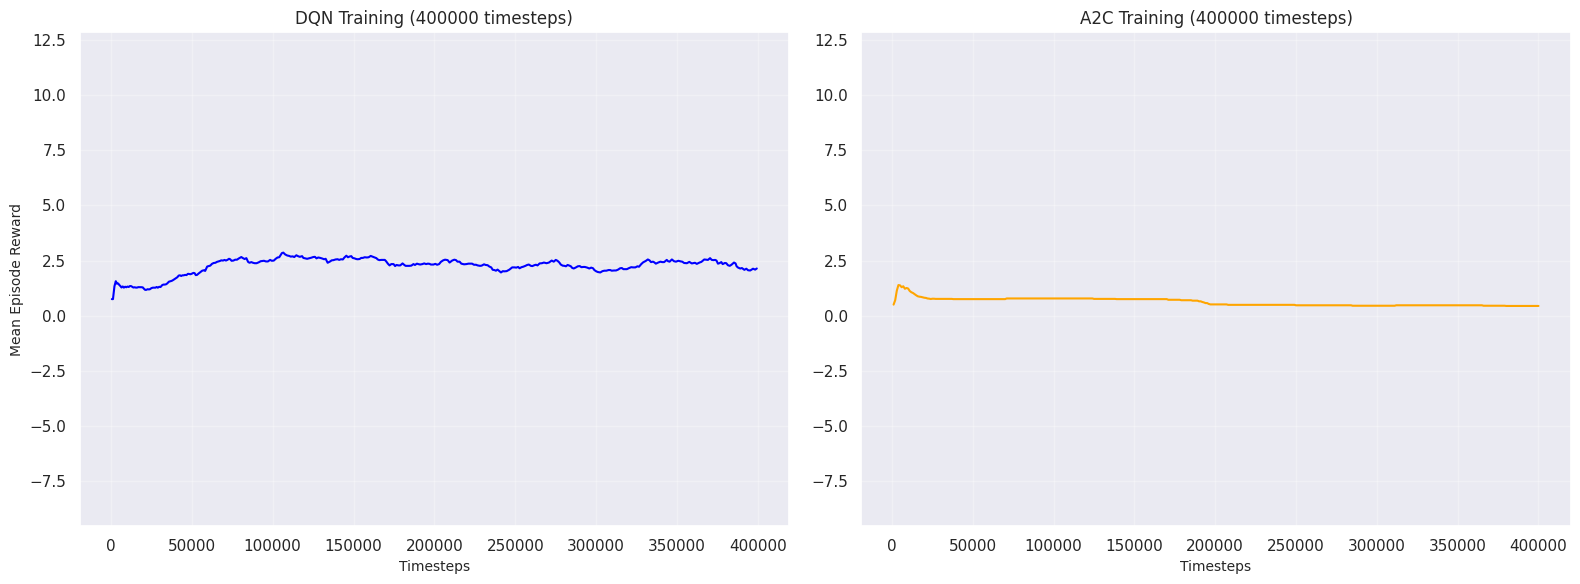

In [4]:
try:
    a2c_log_data = pd.read_csv(f"{a2c_log_path}/progress.csv")
    dqn_log_data = pd.read_csv(f"{dqn_log_path}/progress.csv")
    
    a2c_log_data['Algorithm'] = 'A2C'
    dqn_log_data['Algorithm'] = 'DQN'

    sns.set_theme(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  

    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=dqn_log_data, 
        ax=ax1, 
        color="blue"
    )
    ax1.set_title(f"DQN Training ({total_timesteps} timesteps)", fontsize=12)
    ax1.set_xlabel("Timesteps", fontsize=10)
    ax1.set_ylabel("Mean Episode Reward", fontsize=10)
    ax1.grid(True, alpha=0.3)

    sns.lineplot(
        x="time/total_timesteps", 
        y="rollout/ep_rew_mean", 
        data=a2c_log_data, 
        ax=ax2, 
        color="orange"
    )
    ax2.set_title(f"A2C Training ({total_timesteps} timesteps)", fontsize=12)
    ax2.set_xlabel("Timesteps", fontsize=10)
    ax2.set_ylabel("")  
    ax2.grid(True, alpha=0.3)

    y_min = min(
        dqn_log_data["rollout/ep_rew_mean"].min(), 
        a2c_log_data["rollout/ep_rew_mean"].min()
    ) - 10
    
    y_max = max(
        dqn_log_data["rollout/ep_rew_mean"].max(), 
        a2c_log_data["rollout/ep_rew_mean"].max()
    ) + 10
    
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error loading log files: {e}")
    print("Please check if the CSV files were created in the results directory.")